In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from fcmeans import FCM
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
iris = datasets.load_iris()

data=pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width': iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width': iris.data[:,3],
    'species': iris.target
})

x=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

#x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
#y = pd.DataFrame(iris.target, columns=['Target'])

# Análise Exploratória de Dados (EDA)

In [3]:
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Exibindo nossas classes

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
correlations = data.corr()
correlations

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


A matrix de correção nos indica quais são os atributos que possuem maior correlação entre si.
No plot abaixo, vemos que que há uma forte correlação positiva entre Petal Width Petal Length

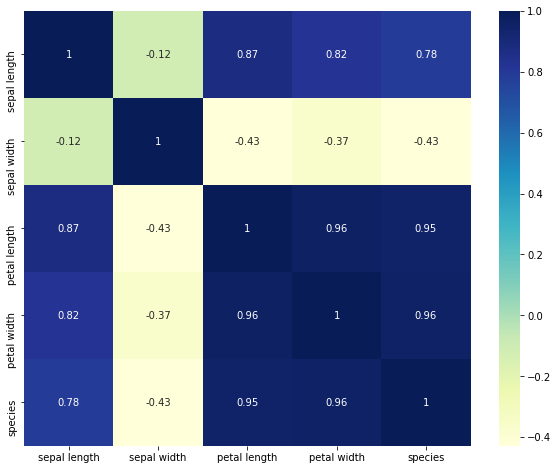

In [6]:
plt.figure(figsize=(10,8)) 
sns.heatmap(
    correlations,
    annot=True,
    xticklabels=correlations.columns.values,
    yticklabels=correlations.columns.values,
    cmap='YlGnBu'
)
plt.show()

Explorando distribuição dos dados

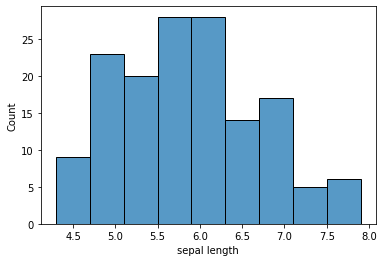

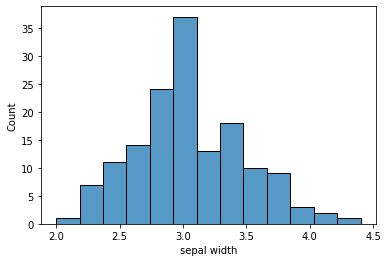

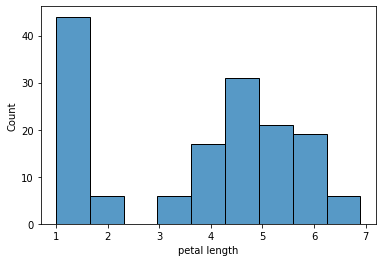

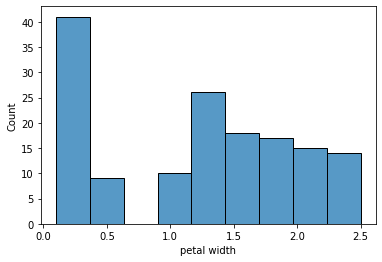

In [7]:
for i, item in enumerate(list(data.columns.values)[:4]):
    plt.figure(i) 
    sns.histplot(data=data[item])

<AxesSubplot:xlabel='sepal length', ylabel='Count'>

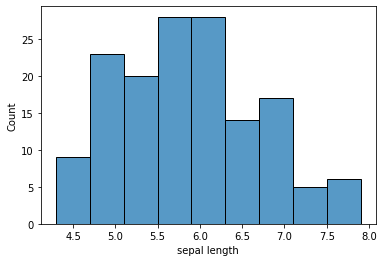

In [8]:
sns.histplot(data=data['sepal length'])

In [9]:
#import pandas as pd
#iris = pd.read_csv("C:\\Users\\bruno\\Downloads\\Iris.csv", names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Target']
#                   ,header=None, skiprows=1) #load the dataset
#iris.head(5)

In [10]:
#x = iris.iloc[:, 0:4] 
#y = iris['Target']

# KNN

In [11]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 111)

Alguns algormitmos podem sofrem problemas se tivermos variáveis com diferetes escalas, por exemplo, algitmomos que trabalham com medidadas de distância. 
Por isso, normalizamos nosso dataset fazendo com que nossos dados tenham média zero e desvio padrão igual a 1

In [14]:
std_slc = StandardScaler()
std_slc.fit(X_train)
X_train_std = std_slc.transform(X_train)
X_test_std = std_slc.transform(X_test)

In [15]:
classifier = KNeighborsClassifier(n_neighbors=16)

In [16]:
classifier.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=16)

In [17]:
y_pred = classifier.predict(X_test_std)

In [18]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Acurácia: {str(round(accuracy, 2)) } %')

Acurácia: 95.56 %


In [19]:
k_values = range(1, 20, 1)
#cross_val_scores = []

cross_val_scores = pd.DataFrame()

i = 1
for K in k_values:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    #cross_val_scores.append(scores.mean())
    cross_val_scores.loc[i, 'error'] = 1 - scores.mean()
    cross_val_scores.loc[i, 'k'] = K
    i += 1

In [20]:
cross_val_scores

,error,k
1,0.036364,1.0
2,0.055455,2.0
3,0.046364,3.0
4,0.046364,4.0
5,0.027273,5.0
6,0.027273,6.0
7,0.027273,7.0
8,0.037273,8.0
9,0.018182,9.0
10,0.027273,10.0


Abaixo conseguimos ver alguns bons candidatos a valores de K

[(0.0, 20.0)]

<Figure size 432x288 with 0 Axes>

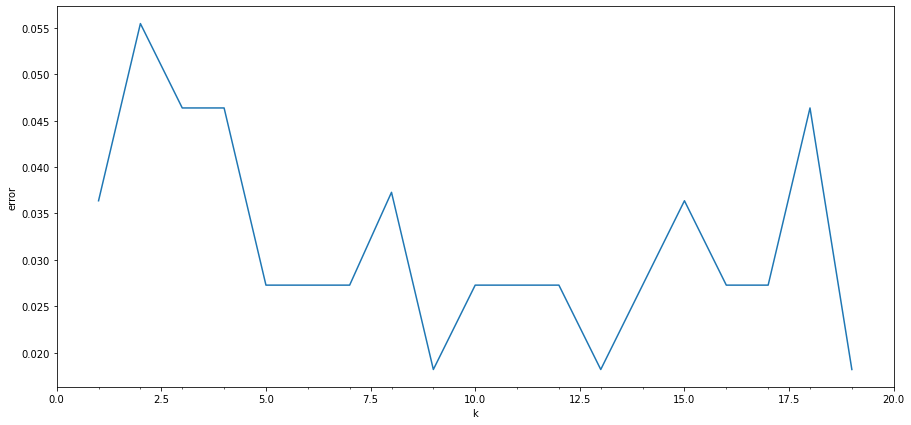

In [21]:
import matplotlib.dates as md
plt.figure()
fig, ax = plt.subplots(figsize = (15, 7))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
my_plot = sns.lineplot(data=cross_val_scores, x="k", y="error")
my_plot.set(xlim=(0, 20))

Treinando novamente o KNN com o melhor valor de K encontrado

In [22]:
classifier_KNN = KNeighborsClassifier(n_neighbors=8)

In [23]:
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [24]:
y_pred = classifier_KNN.predict(X_test)

In [25]:
cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

array([0.90909091, 0.90909091, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [26]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Acurácia: {str(accuracy) } %')

Acurácia: 97.77777777777777 %


In [27]:
grid_params = {
    'n_neighbors': [2,4,6,8,10,12,14,16,20],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params
)

grid.fit(X_train_std,y_train)
y_pred = grid.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Acurácia: {str(round(accuracy, 2)) } %')

Acurácia: 97.78 %


In [28]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 10}

# Suport Vector Machine

In [29]:
from sklearn.svm import SVC

In [30]:
classifier_SVC = SVC(kernel = 'linear', random_state = 1)
#Fit the model for the data

classifier_SVC.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [31]:
y_pred = classifier_SVC.predict(X_test)

In [32]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [33]:
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [34]:
y_pred = grid.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Acurácia: {str(accuracy) } %')

Acurácia: 93.33333333333333 %


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
classifier_RF=RandomForestClassifier(n_estimators=1, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier_RF.fit(X_train, y_train)

y_pred=classifier_RF.predict(X_test)

In [38]:
param_grid = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
classifier_RF = RandomForestClassifier(random_state = 0)
CV_classifier_RF = GridSearchCV(
    estimator=classifier_RF, 
    param_grid=param_grid, cv= 5)
CV_classifier_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]})

In [41]:
y_pred = CV_classifier_RF.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Acurácia: {str(accuracy) } %')

Acurácia: 93.33333333333333 %


# Fuzzy C-means Algorithm

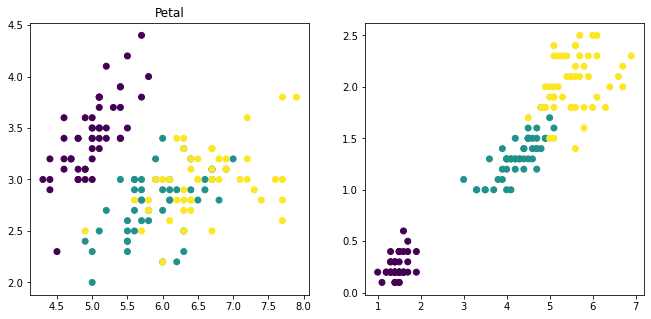

In [43]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(x.iloc[:,0], x.iloc[:,1], c=y)
axes[0].set_title('Sepal')
axes[1].scatter(x.iloc[:,2], x.iloc[:,3], c=y)
axes[0].set_title('Petal')
plt.show()

In [44]:
x = x.to_numpy()

In [45]:
fcm = FCM(n_clusters=3)
fcm.fit(x)

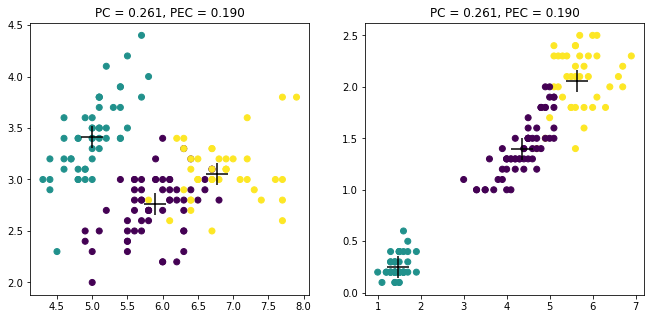

In [46]:
pc = fcm.partition_coefficient
pec = fcm.partition_entropy_coefficient

fcm_centers = fcm.centers
fcm_labels = fcm.predict(x)

# plot result
f, axe = plt.subplots(1, 2, figsize=(11,5))
axe[0].scatter(x[:,0], x[:,1], c=fcm_labels)
axe[0].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
axe[0].set_title(f'PC = {pc:.3f}, PEC = {pec:.3f}')
axe[1].scatter(x[:,2], x[:,3], c=fcm_labels)
axe[1].scatter(fcm_centers[:,2], fcm_centers[:,3], marker="+", s=500, c='black')
axe[1].set_title(f'PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

# Kmeans Algorithm

In [47]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

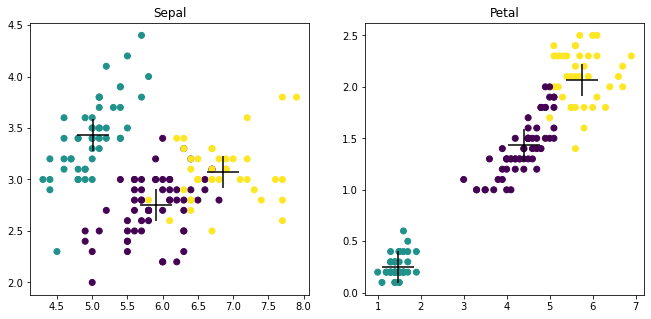

In [49]:
f, axe = plt.subplots(1, 2, figsize=(11,5))
axe[0].scatter(x[:,0], x[:,1], c=fcm_labels)
axe[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="+", s=1000, c='black')
axe[0].set_title(f'Sepal')
axe[1].scatter(x[:,2], x[:,3], c=fcm_labels)
axe[1].scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], marker="+", s=1000, c='black')
axe[1].set_title(f'Petal')
plt.show()

In [50]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}